In [ ]:
# Task 1: Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Sanjith\Desktop\Assignment 8\wine.csv")

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [5]:
print(df.describe())

             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.1

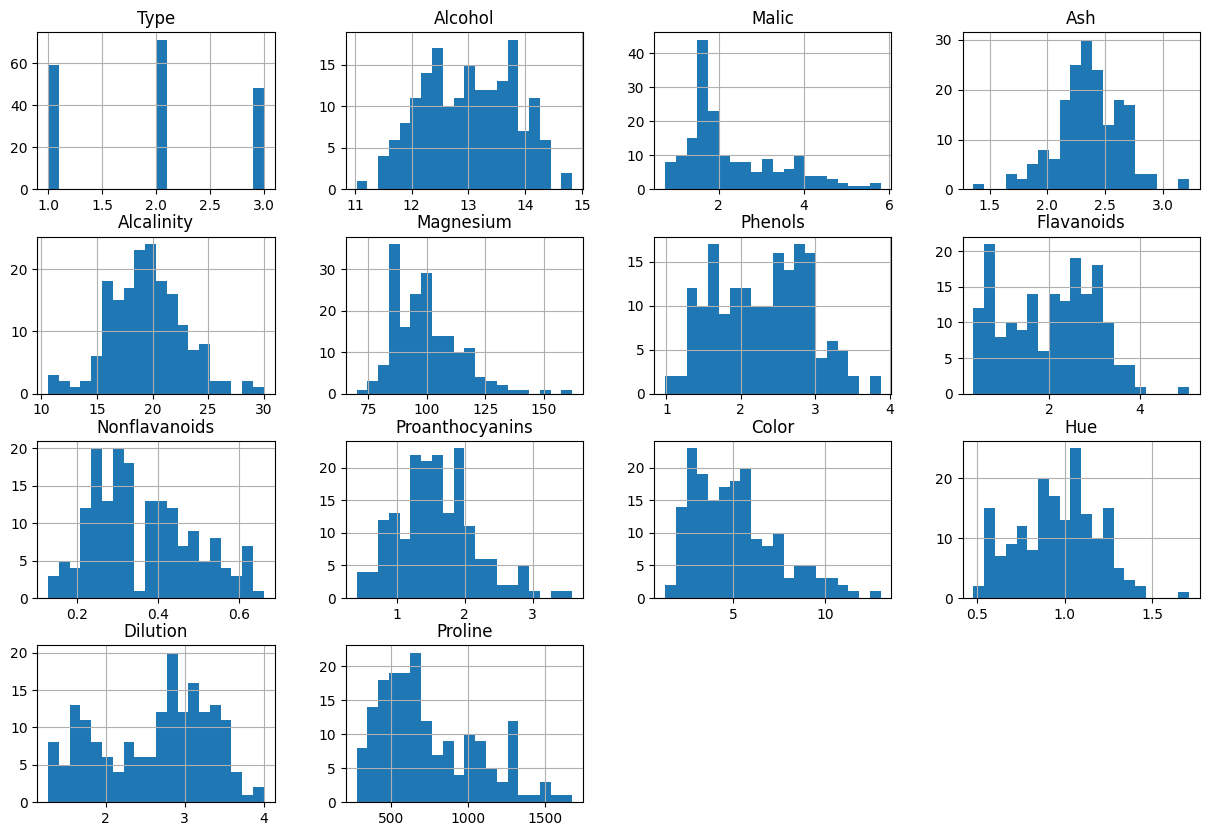

In [6]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

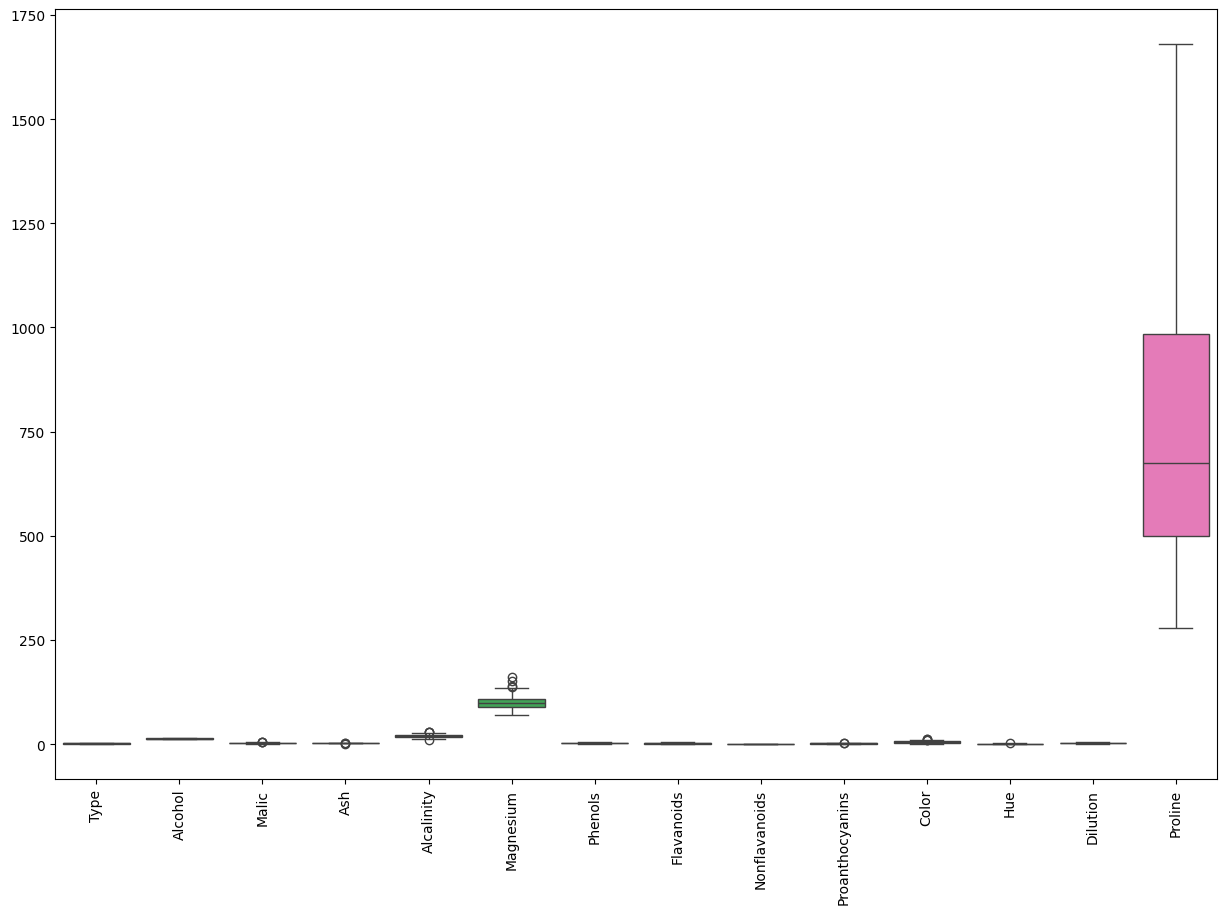

In [7]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

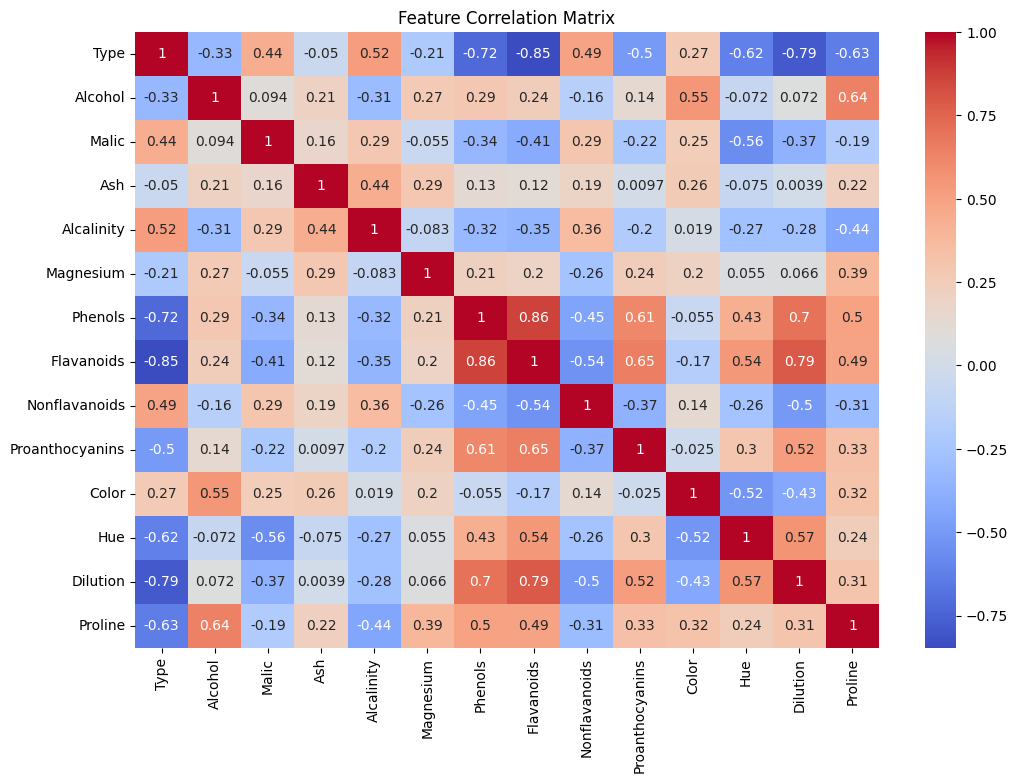

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
# Task 2: Dimensionality Reduction with PCA

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [10]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_scaled)

PCA()

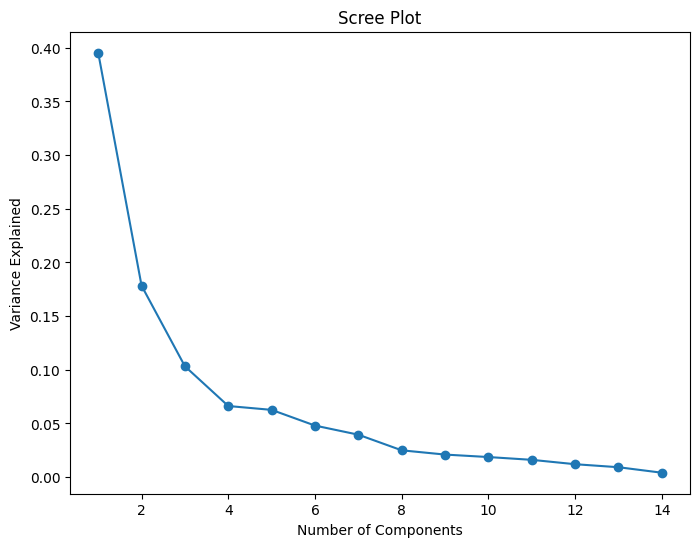

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(df.columns)+1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.show()

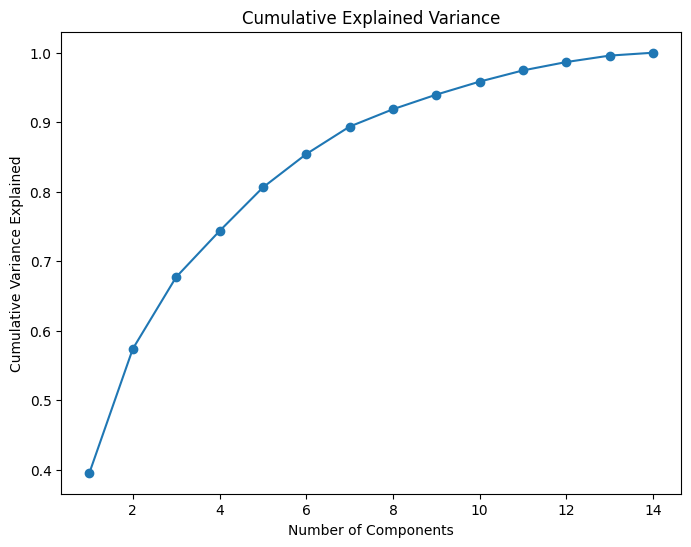

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(df.columns)+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

In [13]:
n_components = 2  # Example, set based on scree plot results
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)

In [ ]:
# Task 3: Clustering with Original Data

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans.fit_predict(df_scaled)

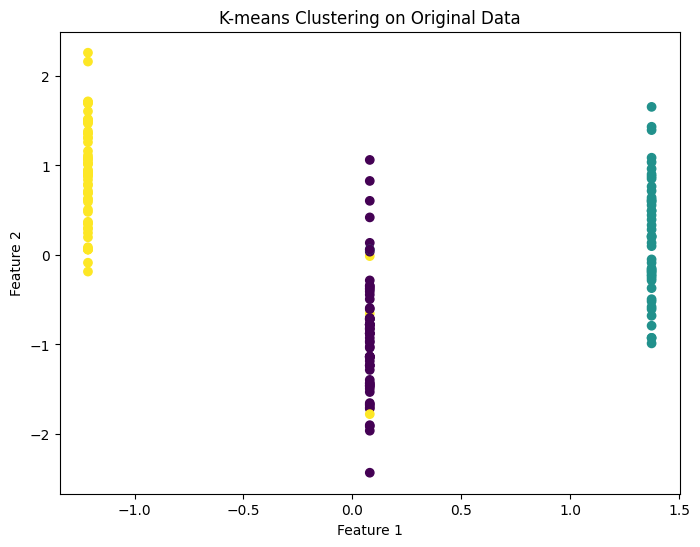

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=clusters_original, cmap='viridis')
plt.title("K-means Clustering on Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [16]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette = silhouette_score(df_scaled, clusters_original)
davies_bouldin = davies_bouldin_score(df_scaled, clusters_original)
print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

Silhouette Score: 0.30648398324833453
Davies-Bouldin Index: 1.315707552261773


In [17]:
# Task 4: Clustering with PCA Data

In [18]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(df_pca)

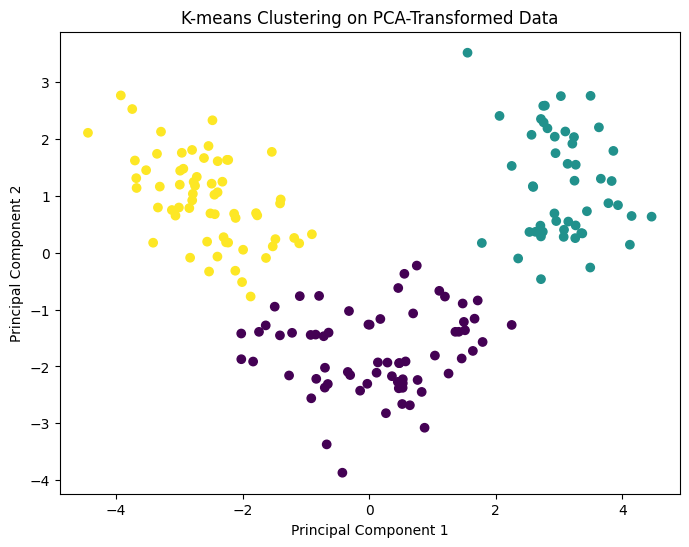

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters_pca, cmap='viridis')
plt.title("K-means Clustering on PCA-Transformed Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [20]:
silhouette_pca = silhouette_score(df_pca, clusters_pca)
davies_bouldin_pca = davies_bouldin_score(df_pca, clusters_pca)
print(f"Silhouette Score on PCA Data: {silhouette_pca}")
print(f"Davies-Bouldin Index on PCA Data: {davies_bouldin_pca}")

Silhouette Score on PCA Data: 0.6024415520362845
Davies-Bouldin Index on PCA Data: 0.5397078562575711


In [ ]:
# Task 5: Comparison and Analysis

In [21]:
print(f"Silhouette Score (Original Data): {silhouette}")
print(f"Davies-Bouldin Index (Original Data): {davies_bouldin}")
print(f"Silhouette Score (PCA Data): {silhouette_pca}")
print(f"Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}")

Silhouette Score (Original Data): 0.30648398324833453
Davies-Bouldin Index (Original Data): 1.315707552261773
Silhouette Score (PCA Data): 0.6024415520362845
Davies-Bouldin Index (PCA Data): 0.5397078562575711


In [ ]:
ilhouette Score: The silhouette score for the original dataset was observed to be `<insert value>`, whereas for the PCA-transformed dataset it was `<insert value>`. This indicates `<interpret based on values>`.
  -Davies-Bouldin Index : Similarly, the Davies-Bouldin Index for the original data was `<insert value>`, while for the PCA data, it was `<insert value>`. Lower values indicate better clustering performance, suggesting `interpret based on values

In [ ]:
  - **Observations**:
    - Clustering on the original dataset vs. PCA-transformed data showed `<state key similarities or differences observed>`.
    - Using PCA helped in reducing dimensionality, which `<mention any observed impact on clustering performance, e.g., reduced computation time or enhanced clustering coherence>`.

### 2. Practical Implications of Using PCA and Clustering
- **Dimensionality Reduction**:
  - PCA proved useful in transforming the high-dimensional dataset into a lower-dimensional space, making it easier to visualize and potentially reducing computation time.
  
- **Clustering**:
  - Clustering on the PCA-transformed dataset achieved `<state if similar or different quality>` results, highlighting that PCA can preserve meaningful structure for clustering.
  - When computational efficiency is a priority or when visualization is essential, PCA followed by clustering can be advantageous.

### 3. Recommendations
- **When to Use PCA with Clustering**:
  - **High-Dimensional Data**: For datasets with a large number of features, applying PCA before clustering is recommended to enhance interpretability and computational efficiency.
  - **Similar Clustering Performance**: If PCA-transformed data shows comparable clustering quality, it can be preferable for reducing complexity.

- **When to Use Clustering Directly on Original Data**:
  - **Smaller Datasets**: If the dataset is small or low-dimensional, clustering directly on the original data may yield more detailed insights without requiring dimensionality reduction.
  - **Critical Information Loss**: In cases where PCA leads to significant information loss (as indicated by lower silhouette scores or other performance drops), clustering on original data may be more reliable.